In [153]:
#loading the dataset

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import warnings
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")
  data = load_boston()
  X = data.data 
  y = data.target

In [154]:
#Splitting the range of target values into three equal parts - low, mid, and high and then 
#reassigning the target values into into three categorical values 0, 1, and 2, representing
#low, mid and high range of values, respectively

import numpy as np
true_index = np.argsort(y)
y_length = len(y)
y[true_index[0:y_length//3]] = 0
y[true_index[y_length//3:2*y_length//3]] = 1
y[true_index[2*y_length//3:y_length]] = 2

In [155]:
#Split the dataset into 70% training set and 30% test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [156]:
#Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can
#be used to generate predictions for your data

from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [157]:
#tree depth

td = clf.get_depth()

In [158]:
td

12

In [159]:
#number of leaves 

clf.get_n_leaves()

59

In [160]:
#feature importance 

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.09455
Feature: 1, Score: 0.02021
Feature: 2, Score: 0.00566
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00997
Feature: 5, Score: 0.25463
Feature: 6, Score: 0.11275
Feature: 7, Score: 0.04012
Feature: 8, Score: 0.02216
Feature: 9, Score: 0.02488
Feature: 10, Score: 0.04161
Feature: 11, Score: 0.03698
Feature: 12, Score: 0.33649


In [161]:
#	the mean accuracy on the given train data and labels

clf.score(X_train, y_train)

1.0

In [162]:
#	the mean accuracy on the given test data and labels

clf.score(X_test, y_test)

0.7039473684210527

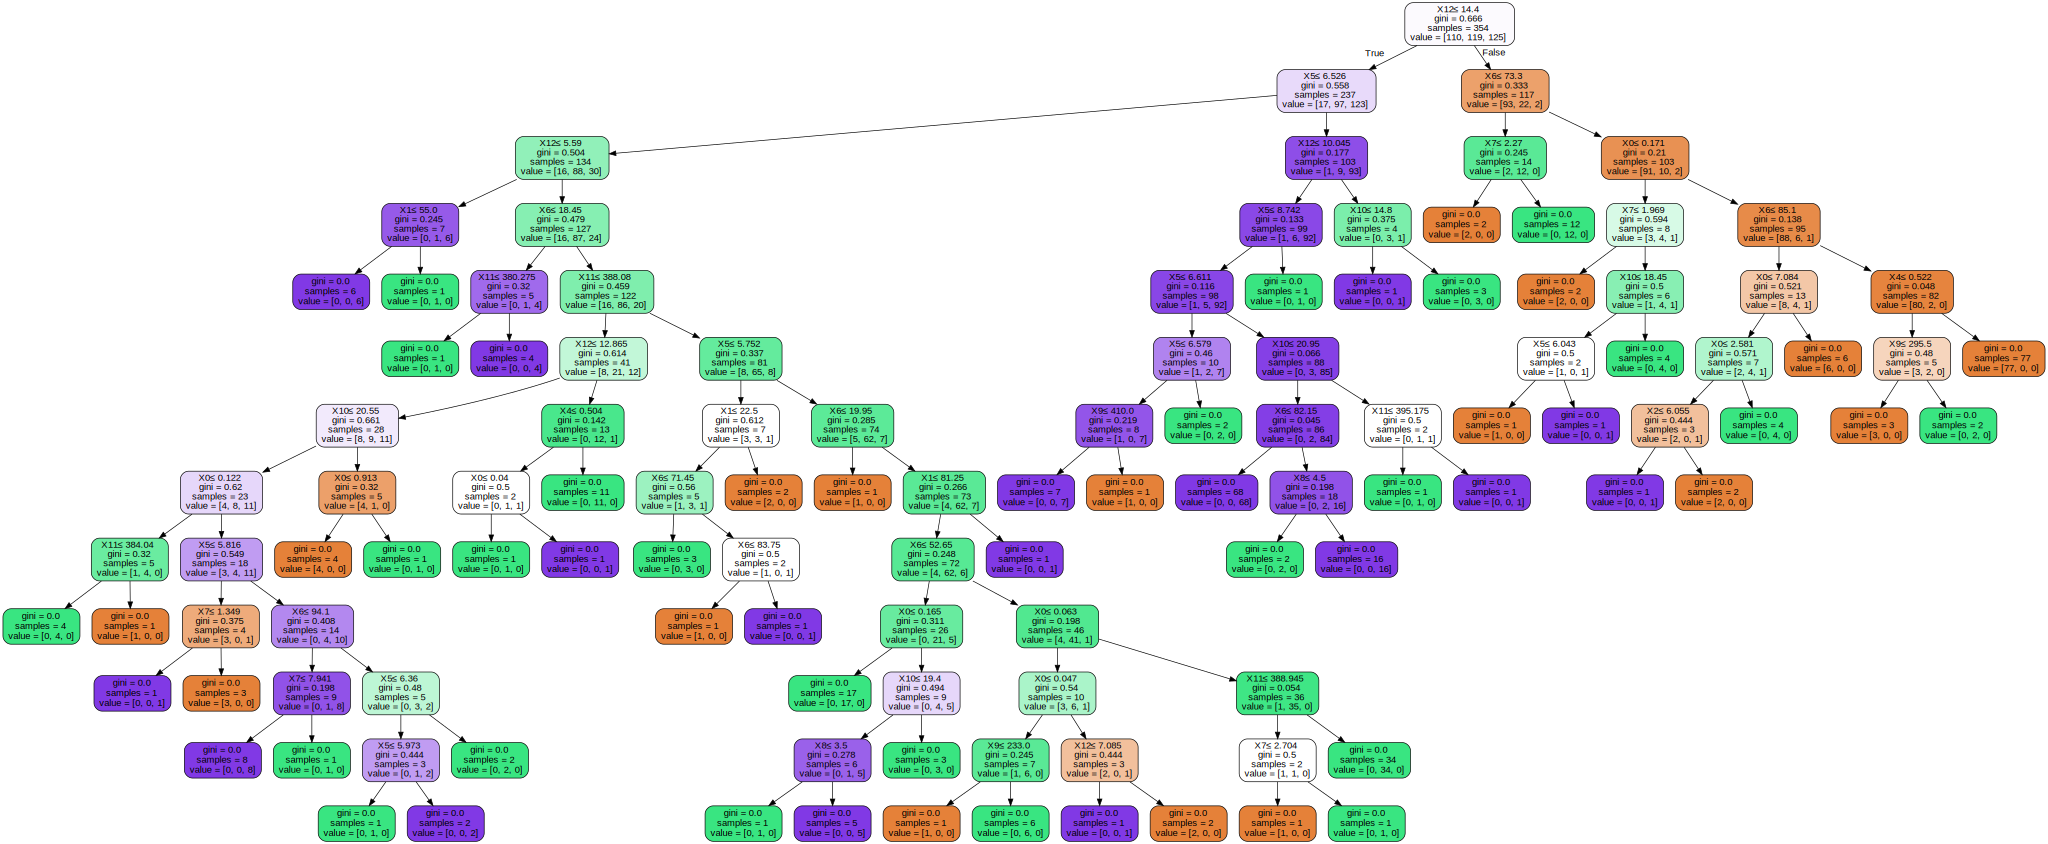

In [163]:
#the visual output of the decision tree

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render()
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [164]:
#Td-1) decision trees on the same training set using fixed tree depths {1, 2, ...(T d −1)}

for i in range(1,td):
  clf = tree.DecisionTreeClassifier(max_depth=i,random_state=42)
  clf.fit(X_train, y_train)
  print("The depth is: ", clf.get_depth())
  print("The number of leaves is:", clf.get_n_leaves())
  print("The train score is:", clf.score(X_train, y_train))
  print("The test score is:", clf.score(X_test, y_test))
  importance = clf.feature_importances_
  # summarize feature importance
  for j,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (j,v))

  print("\n\n")

The depth is:  1
The number of leaves is: 2
The train score is: 0.6101694915254238
The test score is: 0.5921052631578947
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 1.00000



The depth is:  2
The number of leaves is: 4
The train score is: 0.8022598870056498
The test score is: 0.7368421052631579
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.37191
Feature: 6, Score: 0.11122
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.51687



The depth is:  3
The number of leaves is: 8


In [166]:
#the depth with the best test score 

#we have chosen 4 since the train test score difference is the least in this depth. hence we can see that the 
#model is not overfit here unlike at depth=8, where inspite of the test score being large, the difference is also 
#large proving overfitting. 

clf = tree.DecisionTreeClassifier(max_depth=4,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

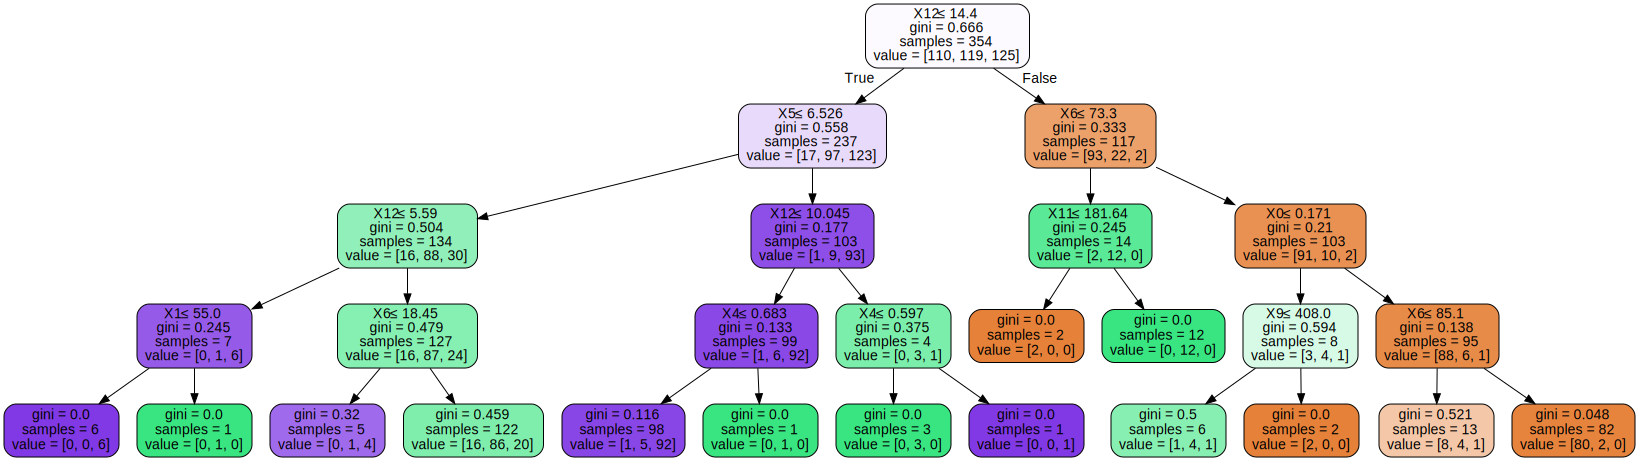

In [167]:
#the visual output of the decision tree with highest test score from the (Td-1) trees

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render()
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph